# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [178]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [179]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [180]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [181]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). Убедитесь, что распределение целевой переменной (`G3`) одинаково в обоих частях.  
  __NB__: Отложенную выборку нужно использовать только для финальной оценки качества модели. Обучение и кросс-валидацию следует проводить на данных для моделирования.  
* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

In [182]:
# Заменим ошибки, соберем уникальные значения столбцов типа object в словарь для возможности дальейшей замены на int
data_clean = data.copy()

mistakes = {'m': 'M', 't': 'T', 'o': '0', 'at-home': 'at_home', 'futher': 'father'}
for cat in ['sex', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian']:
    data_clean[cat] = data_clean[cat].replace(mistakes)

for col in ['famrel', 'Dalc', 'Walc', 'Medu', 'Fedu']:
    data_clean[col] = data_clean[col].fillna('3').astype('int64')

categories = {}
for col in data_clean.columns:
    if data_clean[col].dtype in ['object', 'float']:
        categories[col] = sorted([val for val in data_clean[col].unique() if not str(val)=='nan'])
categories

{'Subject': ['Math', 'Por'],
 'school': ['GP', 'MS'],
 'sex': ['F', 'M'],
 'address': ['R', 'U'],
 'famsize': ['GT3', 'LE3'],
 'Pstatus': ['A', 'T'],
 'Mjob': ['at_home', 'health', 'other', 'services', 'teacher'],
 'Fjob': ['at_home', 'health', 'other', 'services', 'teacher'],
 'reason': ['course', 'home', 'other', 'reputation'],
 'guardian': ['father', 'mother', 'other'],
 'schoolsup': ['no', 'yes'],
 'famsup': ['no', 'yes'],
 'paid': ['no', 'yes'],
 'activities': ['no', 'yes'],
 'nursery': ['no', 'yes'],
 'higher': ['no', 'yes'],
 'internet': ['no', 'yes'],
 'romantic': ['no', 'yes'],
 'cheating': ['no', 'yes']}

In [183]:
data_int = data_clean.copy()

for cat in categories:
    dict_time = {}
    for ind, v in enumerate(categories[cat]):
        dict_time[v] = ind
    data_int[cat] = data_int[cat].map(dict_time)
    if cat in ['romantic', 'cheating']:
        data_int[cat] = data_int[cat].fillna('0').astype('int64')

for column in data_int:
    print(column, data_int[column].unique(), '\n')
data_int.info()

ID [100097 101021 102965 ... 998425 999143 999194] 

Subject [1 0] 

school [0 1] 

sex [0 1] 

age [16 17 18 15 19 21 20 22] 

address [1 0] 

famsize [0 1] 

Pstatus [0 1] 

Medu [3 1 2 4 0] 

Fedu [4 2 3 1 0] 

Mjob [3 2 1 0 4] 

Fjob [2 3 1 0 4] 

reason [0 1 3 2] 

guardian [0 1 2] 

traveltime [1 2 3 4] 

studytime [1 2 4 3] 

failures [0 2 1 3] 

schoolsup [0 1] 

famsup [0 1] 

paid [0 1] 

activities [0 1] 

nursery [1 0] 

higher [1 0] 

internet [1 0] 

romantic [0 1] 

famrel [3 5 4 1 2] 

freetime [2 3 4 1 5] 

goout [1 4 5 3 2] 

Dalc [1 3 4 2 5] 

Walc [4 3 5 1 2] 

health [5 3 4 2 1] 

absences [12  2  0  4  6 10  7 20 14 11 24  8 16 21  1 18  5 22  9  3 15 26 25 54
 56 40 19 13 38 30 17 28 32 23 75] 

cheating [0 1] 

G1 [15 17  9 14 12 11 13  7 16  6  8 10 18  0  5  3  4 19] 

G2 [13 18  8 15 11 12 14  6 10 16  5  7  9 17  0  4 19] 

G3 [14 17 10 16 13 12  9  6 11  8 18 15  0  5  7 19  4  1 20] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 104

### Объяснение действий из Lab №1:

1. Теперь когда мы посмотрели на уникальные значения столбцов, мы можем точно сказать, что столбцы типа **_float64_** спокойно могут быть приведены к типу **_int64_**. Это колонки: **famrel, Dalc, Walc**

    Так как в столбцах присутсвуют значения **_NaN_** мы не можем применить к ним функцию **.astype('int64')**, поэтому мы заменим значения **Nan** на 3 и приведем эти столбцы ткаже к **_int64_**. Так как эти столбцы категориальны и значение их - это величина от 1 до 5, мы возьмем среднее ("нормальное") значение - 3.

    Выведем списки уникальных значений в каждом столбце типа **_object_**. Затем соберем словарь собственоручно для дальнейшей замены значений на нужные нам. Посмотреть количество использований значения мы можем выше, но понять какие типы нам нужны можно и из файла **_'students_data_features'_**


2. Значения **_NaN_** в столбцах **'romantic'** и **'cheating'** мы заменили на 0 для того, чтоб привести эти столбцы к **int64** типу. Так как, по моему мнению, **'no'** в этих графах значит меньше, чем **'yes'**, мы заменим **NaN** именно на **'no'** (0). Также мы можем предположить, что если об этих данных ничего не известно, то указать отсутсвие показателя довольно логично.

In [184]:
# Пропущенные значения
data_int[col].isnull().sum().sum()

0

### Объяснение из Lab 1:

**romantic**: Из-за небольшого количества пропущенных данных, можно предположительно поставить _no_ вместо пропусков, так как это, во-первых, наиболее частотный ответ, во-вторых, он влияет на данные меньше, чем yes в данной графе, как мне кажется.

**famrel**: Так как это довольно важный признак, как мне кажется, а пропусков не так много, можно заполнить их средним значением по столбцу как наиболее сбалансированный вариант.

**Dalc**: Предположить значение по данному признаку практически невозможно, подставить случайное значние тоже плохая идея, поэтому, как и в предыдущем случае, можно заполнить его средним значением.

**Walc**: Та же ситуация как и с Dalc.

**cheating**: С одной стороны, пропущено 67% данных, что позволяет нам удалить этот столбец, если мы можем пренебречь некоторой точностью результата. С другой стороны, отсутствие данных можно интерпретировать как _no_, так как если они не были пойманы на списывании, мы и не можем ничего посчитать.

In [185]:
data_int.head()

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,1,0,0,16,1,0,0,3,4,3,2,0,0,1,1,0,0,0,0,0,1,1,1,0,3,2,1,1,4,5,12,0,15,13,14
1,101021,1,0,0,17,1,0,1,3,2,2,2,0,1,1,2,0,0,0,0,1,0,1,1,0,5,3,4,1,3,3,2,0,17,18,17
2,102965,1,0,1,16,1,1,1,1,2,1,3,0,1,2,1,2,0,0,0,0,0,1,1,0,4,4,5,3,5,5,0,1,9,8,10
3,102989,1,1,1,17,1,0,1,2,3,2,3,1,0,2,2,0,0,0,0,1,1,1,1,0,4,4,3,1,1,3,4,0,14,15,16
4,103131,1,0,0,16,1,0,1,1,1,0,2,1,1,2,1,0,0,1,0,0,1,1,0,0,4,3,2,1,4,5,2,1,12,13,13


### Какие признаки нам не понадобятся

Такие признаки, как **ID, cheating** не понадобятся в обучении, так как ID не несет никакого практического смысла, а cheeting содержал множество пропусков, также я не могу установить, однозначно ли влияние этой графы.

In [186]:
data_clean = data_int.drop(columns=['ID', 'cheating'])
data_clean.head()

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,0,16,1,0,0,3,4,3,2,0,0,1,1,0,0,0,0,0,1,1,1,0,3,2,1,1,4,5,12,15,13,14
1,1,0,0,17,1,0,1,3,2,2,2,0,1,1,2,0,0,0,0,1,0,1,1,0,5,3,4,1,3,3,2,17,18,17
2,1,0,1,16,1,1,1,1,2,1,3,0,1,2,1,2,0,0,0,0,0,1,1,0,4,4,5,3,5,5,0,9,8,10
3,1,1,1,17,1,0,1,2,3,2,3,1,0,2,2,0,0,0,0,1,1,1,1,0,4,4,3,1,1,3,4,14,15,16
4,1,0,0,16,1,0,1,1,1,0,2,1,1,2,1,0,0,1,0,0,1,1,0,0,4,3,2,1,4,5,2,12,13,13


In [187]:
from sklearn.model_selection import train_test_split

{0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}


(array([ 42.,   0.,   9.,  31.,  99., 254., 170., 134.,  69.,  27.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

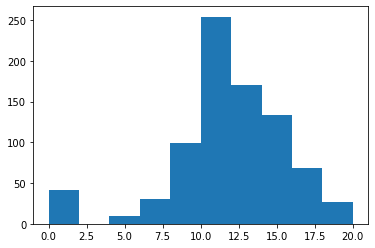

In [188]:
X = data_clean.drop(columns=['G3'])
y = data_clean['G3']

def get_splitted(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    while not len(set(y_train)) == len(set(y)):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_splitted(X, y)
print(set(y_train))
plt.hist(y_train)

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* Для решения задачи примените следующие методы:  
  * Линейная регрессия + регуляризации  
  * Полиномиальная регрессия  
  * KNN  
  * Деревья решений, Random Forest  
  
  Для каждого метода выполните настройку гиперпараметров на кросс-валидации.  
<br>    
* Оцените качество каждой модели на отложенной выборке, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

In [189]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, mean_squared_error, mean_absolute_error

### Решение 1

#### С использованием G1

In [190]:
X_train, X_test, y_train_with_g1, y_test_with_g1 = get_splitted(X, y)

X_train_with_g1 = X_train.drop(columns=['G2'])
X_test_with_g1 = X_test.drop(columns=['G2'])

In [191]:
# Linear Model

linear_model = LinearRegression()
linear_model.fit(X_train_with_g1, y_train_with_g1)

y_pred_linear = linear_model.predict(X_test_with_g1)

print(f'No regularization score: {linear_model.score(X_test_with_g1, y_test_with_g1)} // \
(mean_absolute) {mean_absolute_error(y_test_with_g1, y_pred_linear)} // \
(mean_square) {mean_squared_error(y_test_with_g1, y_pred_linear)}')

# Ridge Regularization

ridge_model = Ridge()
ridge_model.fit(X_train_with_g1, y_train_with_g1)

ridge_params = {'alpha': [i*0.25 for i in range(1,10)]}

search = RandomizedSearchCV(ridge_model, scoring='neg_mean_squared_error', cv=5, n_iter=9, refit=True, n_jobs=-1, param_distributions=ridge_params)
search.fit(X_train_with_g1, y_train_with_g1)
ridge_model = search.best_estimator_

y_pred_ridge = ridge_model.predict(X_test_with_g1)

print(f'Ridge regularization score: {ridge_model.score(X_test_with_g1, y_test_with_g1)} // \
(mean_absolute) {mean_absolute_error(y_test_with_g1, y_pred_ridge)} // \
(mean_square) {mean_squared_error(y_test_with_g1, y_pred_ridge)}')

# Lasso Regularization

lasso_model = Lasso()
lasso_model.fit(X_train_with_g1, y_train_with_g1)

lasso_params = {'alpha': [i*0.25 for i in range(1,10)]}

search = RandomizedSearchCV(lasso_model, scoring='neg_mean_squared_error', cv=5, n_iter=9, refit=True, n_jobs=-1, param_distributions=lasso_params)
search.fit(X_train_with_g1, y_train_with_g1)
lasso_model = search.best_estimator_

y_pred_lasso = ridge_model.predict(X_test_with_g1)

print(f'Lasso regularization score: {lasso_model.score(X_test_with_g1, y_test_with_g1)} // \
(mean_absolute) {mean_absolute_error(y_test_with_g1, y_pred_lasso)} // \
(mean_square) {mean_squared_error(y_test_with_g1, y_pred_lasso)}')

No regularization score: 0.694486228517931 // (mean_absolute) 1.5502003986376092 // (mean_square) 5.1551610868825515
Ridge regularization score: 0.6944873041674822 // (mean_absolute) 1.5483729317450925 // (mean_square) 5.15514293664768
Lasso regularization score: 0.6665605728322346 // (mean_absolute) 1.5483729317450925 // (mean_square) 5.15514293664768


In [192]:
# Coeficents
pd.DataFrame(linear_model.coef_, X_test_with_g1.columns, columns=['Coefficients']).T

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
Coefficients,1.105559,0.014321,-0.036368,0.038631,0.395731,0.060455,-0.148726,0.123166,-0.011537,-0.049181,-0.095495,-0.011531,0.090384,0.133136,-0.032731,-0.509279,0.269972,0.100324,0.360929,-0.075726,-0.305605,0.247188,0.254716,-0.458805,0.056264,-0.035276,-0.145846,-0.044089,0.046436,-0.061791,0.025008,0.962739


In [193]:
pd.DataFrame(ridge_model.coef_, X_test_with_g1.columns, columns=['Coefficients']).T

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
Coefficients,1.085144,0.015155,-0.037534,0.037164,0.388768,0.059695,-0.145167,0.122689,-0.011051,-0.048544,-0.095118,-0.011188,0.090694,0.13076,-0.032417,-0.507633,0.262243,0.101712,0.344736,-0.075172,-0.299356,0.239295,0.250516,-0.452902,0.056412,-0.036392,-0.144878,-0.043501,0.046263,-0.061919,0.024788,0.962768


In [194]:
pd.DataFrame(lasso_model.coef_, X_test_with_g1.columns, columns=['Coefficients']).T

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
Coefficients,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.021556,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.002831,0.994903


### Комментарий к весам признаков

+ 1) (LinearRegression) Признак Subject сильно перевешивает остальные кроме G1, а другие признаки распределены довольно равномерно, среди них наибольшую значимость (корреляцию, хоть и отрицательную) имеет признак failures, что логично - чем больше провалов, тем ниже оценка.
+ 2) (RidgeRegression) Коэффициенты очень похожи на модель LinearRegression, имеет те же особенности.
+ 3) (LassoRegression) Выделяет только 3 значимых признака - failures (2-е место по значимости, отрицательная корреляция), absences (наименее значимый) и G1 (самый значимый).

In [195]:
# KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_with_g1, y_train_with_g1)

knn_params = {
    'n_neighbors': list(range(1, 20)),
    'leaf_size': list(range(10, 61, 5)),
    'metric': ['chebyshev', 'euclidean', 'manhattan', 'minkowski']
}

search = RandomizedSearchCV(knn_model, scoring='neg_mean_squared_error', cv=5, refit=True, n_jobs=-1, param_distributions=knn_params)
search.fit(X_train_with_g1, y_train_with_g1)
knn_model = search.best_estimator_

y_pred_knn = knn_model.predict(X_test_with_g1)

print(f'KNN score: {knn_model.score(X_test_with_g1, y_test_with_g1)} // \
(mean_absolute) {mean_absolute_error(y_test_with_g1, y_pred_knn)} // \
(mean_square) {mean_squared_error(y_test_with_g1, y_pred_knn)}')
knn_model

KNN score: 0.6678097770289924 // (mean_absolute) 1.6299840510366828 // (mean_square) 5.605292693011991


KNeighborsRegressor(metric='euclidean', n_neighbors=9)

In [196]:
# RandomForestRegressor

ranforest_model = RandomForestRegressor()
ranforest_model.fit(X_train_with_g1, y_train_with_g1)

ranforest_params = {
    'n_estimators': list(range(40, 141, 20)),
    'max_depth': list(range(1, 4)),
    'min_samples_split': list(range(2, 5)),
    'criterion': ['mse', 'mae']
}

search = RandomizedSearchCV(ranforest_model, scoring='neg_mean_squared_error', cv=5, refit=True, n_jobs=-1, param_distributions=ranforest_params)
search.fit(X_train_with_g1, y_train_with_g1)
ranforest_model = search.best_estimator_

y_pred_forest = ranforest_model.predict(X_test_with_g1)

print(f'Random Forest score:{ranforest_model.score(X_test_with_g1, y_test_with_g1)} // \
(mean_absolute) {mean_absolute_error(y_test_with_g1, y_pred_forest)} // \
(mean_square) {mean_squared_error(y_test_with_g1, y_pred_forest)}')
ranforest_model

Random Forest score:0.7471686800380746 // (mean_absolute) 1.3749869810983144 // (mean_square) 4.266210900706867


RandomForestRegressor(max_depth=3, min_samples_split=3, n_estimators=140)

In [197]:
# DecisionTreeRegressor

dec_tree_model = DecisionTreeRegressor()
dec_tree_model.fit(X_train_with_g1, y_train_with_g1)

dec_tree_params = {
    'max_depth': list(range(1, 4)),
    'min_samples_split': list(range(2, 5)),
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson']
}

search = RandomizedSearchCV(dec_tree_model, scoring='neg_mean_squared_error', cv=5, refit=True, n_jobs=-1, param_distributions=dec_tree_params)
search.fit(X_train_with_g1, y_train_with_g1)
dec_tree_model = search.best_estimator_

y_pred_forest = dec_tree_model.predict(X_test_with_g1)

print(f'Decision Tree score:{dec_tree_model.score(X_test_with_g1, y_test_with_g1)} // \
(mean_absolute) {mean_absolute_error(y_test_with_g1, y_pred_forest)} // \
(mean_square) {mean_squared_error(y_test_with_g1, y_pred_forest)}')
dec_tree_model

Decision Tree score:0.7098997212177507 // (mean_absolute) 1.4831064920144368 // (mean_square) 4.895077761035741


DecisionTreeRegressor(max_depth=3)

### Комментарий к решению с использованием G1

В целом модели справились с задачей довольно неплохо. Наилучший результат показала модель RandomForest, наихудший - LassoRegression. Соответственно, среди линейных регрессий эта регуляризация справилась хуже остальных, в то время как регуляризация L2 справилась незначительно лучше модели без регуляризации.

### Решение 2

#### Без G1

In [198]:
X_train, X_test, y_train_no_g1, y_test_no_g1 = get_splitted(X, y)

X_train_no_g1 = X_train.drop(columns=['G2', 'G1'])
X_test_no_g1 = X_test.drop(columns=['G2', 'G1'])

In [199]:
# Linear Model

linear_model = LinearRegression()
linear_model.fit(X_train_no_g1, y_train_no_g1)

y_pred_linear = linear_model.predict(X_test_no_g1)

print(f'No regularization score: {linear_model.score(X_test_no_g1, y_test_no_g1)} // \
(mean_absolute) {mean_absolute_error(y_test_no_g1, y_pred_linear)} // \
(mean_square) {mean_squared_error(y_test_no_g1, y_pred_linear)}')

# Ridge Regularization

ridge_model = Ridge()
ridge_model.fit(X_train_no_g1, y_train_no_g1)

ridge_params = {'alpha': [i*0.25 for i in range(1,10)]}

search = RandomizedSearchCV(ridge_model, scoring='neg_mean_squared_error', cv=5, n_iter=9, refit=True, n_jobs=-1, param_distributions=ridge_params)
search.fit(X_train_no_g1, y_train_no_g1)
ridge_model = search.best_estimator_

y_pred_ridge = ridge_model.predict(X_test_no_g1)

print(f'Ridge regularization score: {ridge_model.score(X_test_no_g1, y_test_no_g1)} // \
(mean_absolute) {mean_absolute_error(y_test_no_g1, y_pred_ridge)} // \
(mean_square) {mean_squared_error(y_test_no_g1, y_pred_ridge)}')

# Lasso Regularization

lasso_model = Lasso()
lasso_model.fit(X_train_no_g1, y_train_no_g1)

lasso_params = {'alpha': [i*0.25 for i in range(1,10)]}

search = RandomizedSearchCV(lasso_model, scoring='neg_mean_squared_error', cv=5, n_iter=9, refit=True, n_jobs=-1, param_distributions=lasso_params)
search.fit(X_train_no_g1, y_train_no_g1)
lasso_model = search.best_estimator_

y_pred_lasso = ridge_model.predict(X_test_no_g1)

print(f'Lasso regularization score: {lasso_model.score(X_test_no_g1, y_test_no_g1)} // \
(mean_absolute) {mean_absolute_error(y_test_no_g1, y_pred_lasso)} // \
(mean_square) {mean_squared_error(y_test_no_g1, y_pred_lasso)}')

No regularization score: 0.19653707866454695 // (mean_absolute) 2.4700931934912123 // (mean_square) 11.957638414988716
Ridge regularization score: 0.19758205000398044 // (mean_absolute) 2.4662940164985065 // (mean_square) 11.942086497035609
Lasso regularization score: 0.16272669612166546 // (mean_absolute) 2.4662940164985065 // (mean_square) 11.942086497035609


In [200]:
# Coeficents
pd.DataFrame(linear_model.coef_, X_train_no_g1.columns, columns=['Coefficients']).T

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
Coefficients,1.731962,-0.859954,-0.220846,0.036989,0.512611,0.598763,0.079706,0.329351,0.075667,0.038334,0.126794,0.099673,-0.081526,0.003317,0.380337,-1.55912,-1.471318,-0.387777,-0.167968,0.139787,-0.276255,1.715776,0.323681,-0.715227,0.068655,0.176832,-0.315716,-0.144435,-0.066111,-0.193726,0.016456


In [201]:
pd.DataFrame(ridge_model.coef_, X_train_no_g1.columns, columns=['Coefficients']).T

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
Coefficients,1.699715,-0.840571,-0.213836,0.034553,0.508581,0.591252,0.077476,0.330756,0.076692,0.04012,0.127223,0.100125,-0.08035,0.000442,0.380709,-1.557464,-1.425979,-0.38056,-0.180473,0.13917,-0.271197,1.651521,0.320778,-0.704546,0.069381,0.172601,-0.314073,-0.146717,-0.064698,-0.193367,0.015995


In [202]:
pd.DataFrame(lasso_model.coef_, X_train_no_g1.columns, columns=['Coefficients']).T

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
Coefficients,0.249256,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.376351,0.0,0.021223,0.0,0.027706,-0.0,-0.0,0.066894,-1.482375,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.090991,-0.005657,-0.065544,-0.077049,-0.006835


### Комментарий к коэффициентам

+ 1) (LinearRegression) Аналогично первой части этого задания, для данной модели наиболее важным признаком является Subject. Почти такими же по значимости стали признаки schoolsup и higher (с одним отрицательная корреляция, со вторым положительная). По данным этих коэффициентов чем больше дополнительная помощь в учебе, тем ниже оценка, что менее логично, чем второй признак (higher).
+ 2) (RidgeRegression) Аналогично первой части: коэффициенты очень похожи на модель LinearRegression, имеет те же особенности.
+ 3) (LassoRegression) Выделяет 11 значимых признаков (~35% признаков), среди которых наибольшее значение имеет failures (также как до - чем больше провалов, тем ниже оценка), остальные признаки ощутимо менее значимые.

In [203]:
# KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_no_g1, y_train_no_g1)

knn_params = {
    'n_neighbors': list(range(1, 20)),
    'leaf_size': list(range(10, 61, 5)),
    'metric': ['chebyshev', 'euclidean', 'manhattan', 'minkowski']
}

search = RandomizedSearchCV(knn_model, scoring='neg_mean_squared_error', cv=5, refit=True, n_jobs=-1, param_distributions=knn_params)
search.fit(X_train_no_g1, y_train_no_g1)
knn_model = search.best_estimator_

y_pred_knn = knn_model.predict(X_test_no_g1)

print(f'KNN score: {knn_model.score(X_test_no_g1, y_test_no_g1)} // \
(mean_absolute) {mean_absolute_error(y_test_no_g1, y_pred_knn)} // \
(mean_square) {mean_squared_error(y_test_no_g1, y_pred_knn)}')
knn_model

KNN score: 0.13868849643852432 // (mean_absolute) 2.50587211831231 // (mean_square) 12.818577247024397


KNeighborsRegressor(leaf_size=50, metric='manhattan', n_neighbors=11)

In [204]:
# RandomForestRegressor

ranforest_model = RandomForestRegressor()
ranforest_model.fit(X_train_no_g1, y_train_no_g1)

ranforest_params = {
    'n_estimators': list(range(40, 141, 20)),
    'max_depth': list(range(1, 4)),
    'min_samples_split': list(range(2, 5)),
    'criterion': ['mse', 'mae']
}

search = RandomizedSearchCV(ranforest_model, scoring='neg_mean_squared_error', cv=5, refit=True, n_jobs=-1, param_distributions=ranforest_params)
search.fit(X_train_no_g1, y_train_no_g1)
ranforest_model = search.best_estimator_

y_pred_forest = ranforest_model.predict(X_test_no_g1)

print(f'Random Forest score: {ranforest_model.score(X_test_no_g1, y_test_no_g1)} // \
(mean_absolute) {mean_absolute_error(y_test_no_g1, y_pred_forest)} // \
(mean_square) {mean_squared_error(y_test_no_g1, y_pred_forest)}')
ranforest_model

Random Forest score: 0.20705308478429074 // (mean_absolute) 2.4643540669856456 // (mean_square) 11.801132625598086


RandomForestRegressor(criterion='mae', max_depth=3, n_estimators=80)

In [225]:
# DecisionTreeRegressor

dec_tree_model = DecisionTreeRegressor()
dec_tree_model.fit(X_train_no_g1, y_train_no_g1)

dec_tree_params = {
    'max_depth': list(range(1, 4)),
    'min_samples_split': list(range(2, 5)),
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson']
}

search = RandomizedSearchCV(dec_tree_model, scoring='neg_mean_squared_error', cv=5, refit=True, n_jobs=-1, param_distributions=dec_tree_params)
search.fit(X_train_no_g1, y_train_no_g1)
dec_tree_model = search.best_estimator_

y_pred_forest = dec_tree_model.predict(X_test_no_g1)

print(f'Decision Tree score: {dec_tree_model.score(X_test_no_g1, y_test_no_g1)} // \
(mean_absolute) {mean_absolute_error(y_test_no_g1, y_pred_forest)} // \
(mean_square) {mean_squared_error(y_test_no_g1, y_pred_forest)}')
dec_tree_model

Decision Tree score: 0.1843477115357992 // (mean_absolute) 2.566043504332294 // (mean_square) 12.13904821096393


DecisionTreeRegressor(max_depth=2)

### Комментарий к решению без G1

В целом все модели справились значительно хуже, чем с признаком G1 - только одна модель достигла 20% успешности, остальные меньше. Этой моделью, самой успешной из данных, стала (как и в первом этапе) RandomForest, а худшей - KNN. В основном наблюдается тенденция идентичная решению с G1 (ранжирование моделей по успешности). Среди линейных регуляризация LassoRegression все так же имеет худший результат.

## Часть 3. Бинарная классификация

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  


In [206]:
X_train, X_test, y_train, y_test = get_splitted(X, y)

X_train_binary = X_train.drop(columns=['G1', 'G2'])
X_test_binary = X_test.drop(columns=['G1', 'G2'])

y_train_binary = np.where(y_train>=8, 1, 0)
y_test_binary = np.where(y_test>=8, 1, 0)

#X_binary = X.drop(columns=['G1', 'G2'])
#y_binary = np.where(y>=8, 1, 0)
data_binary = data_clean.drop(columns=['G1', 'G2'])

### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

Tree 1 roc_auc_score: 0.606959706959707


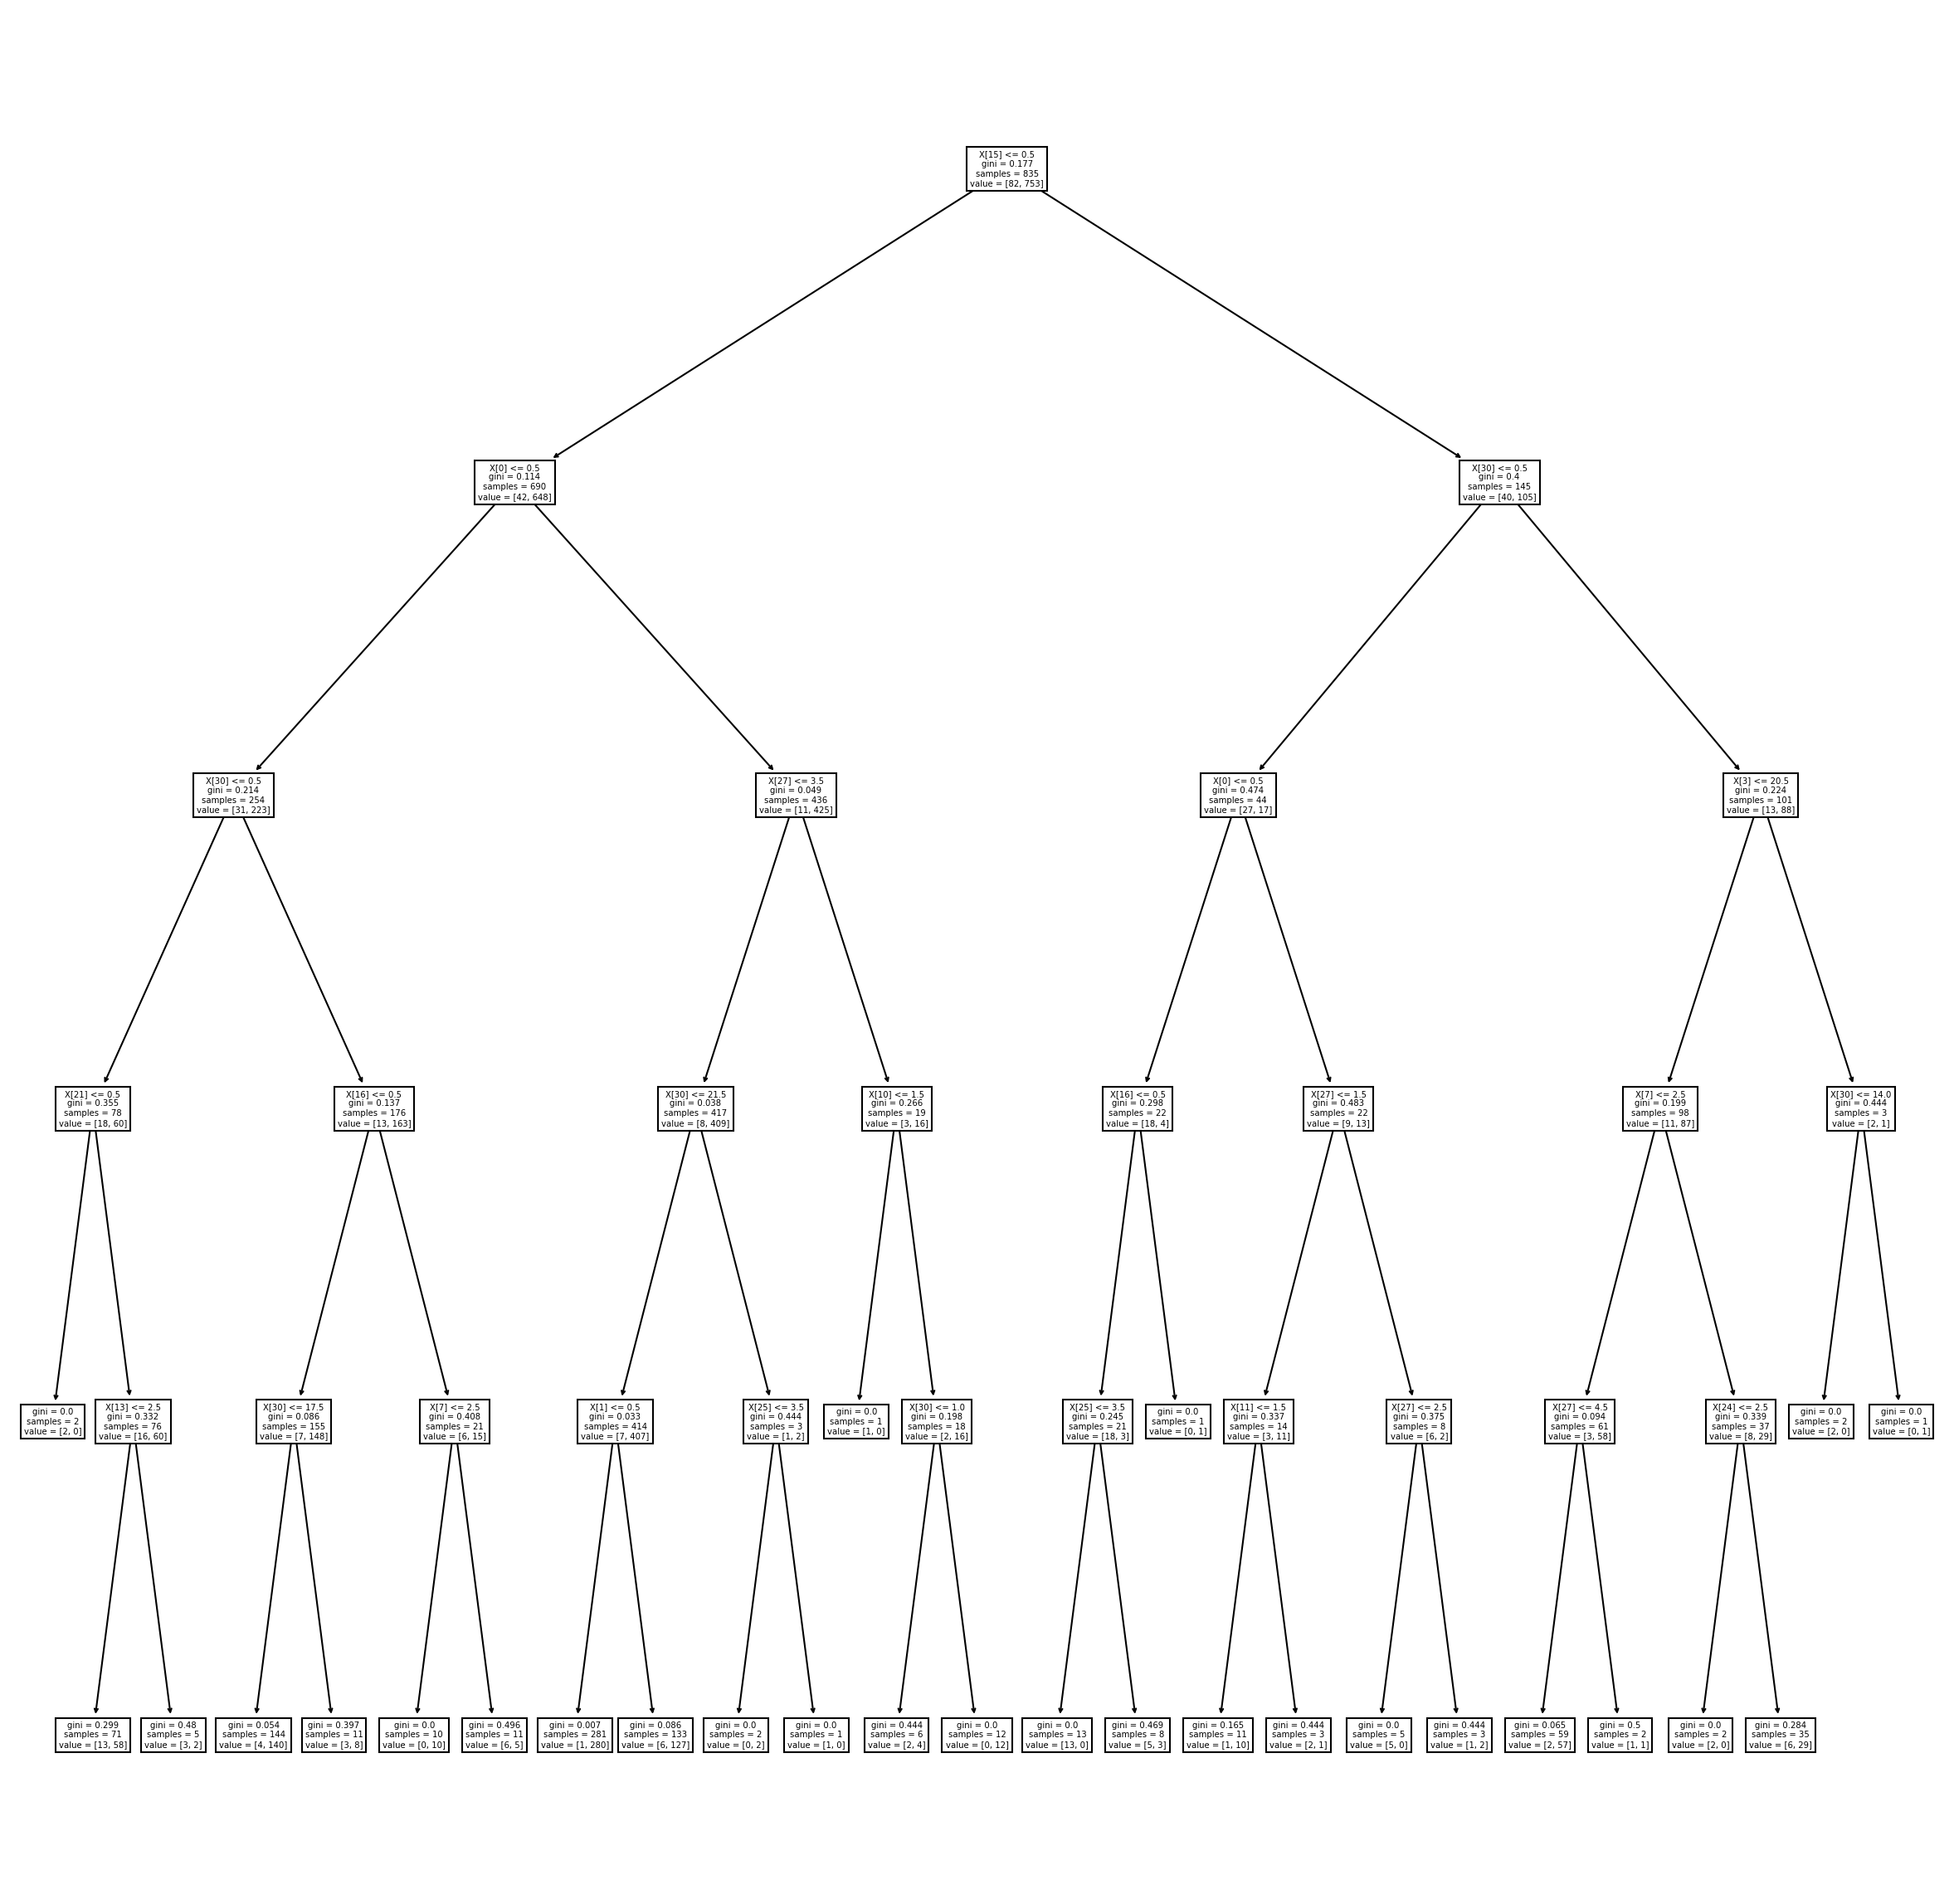

Tree 2 roc_auc_score: 0.599748743718593


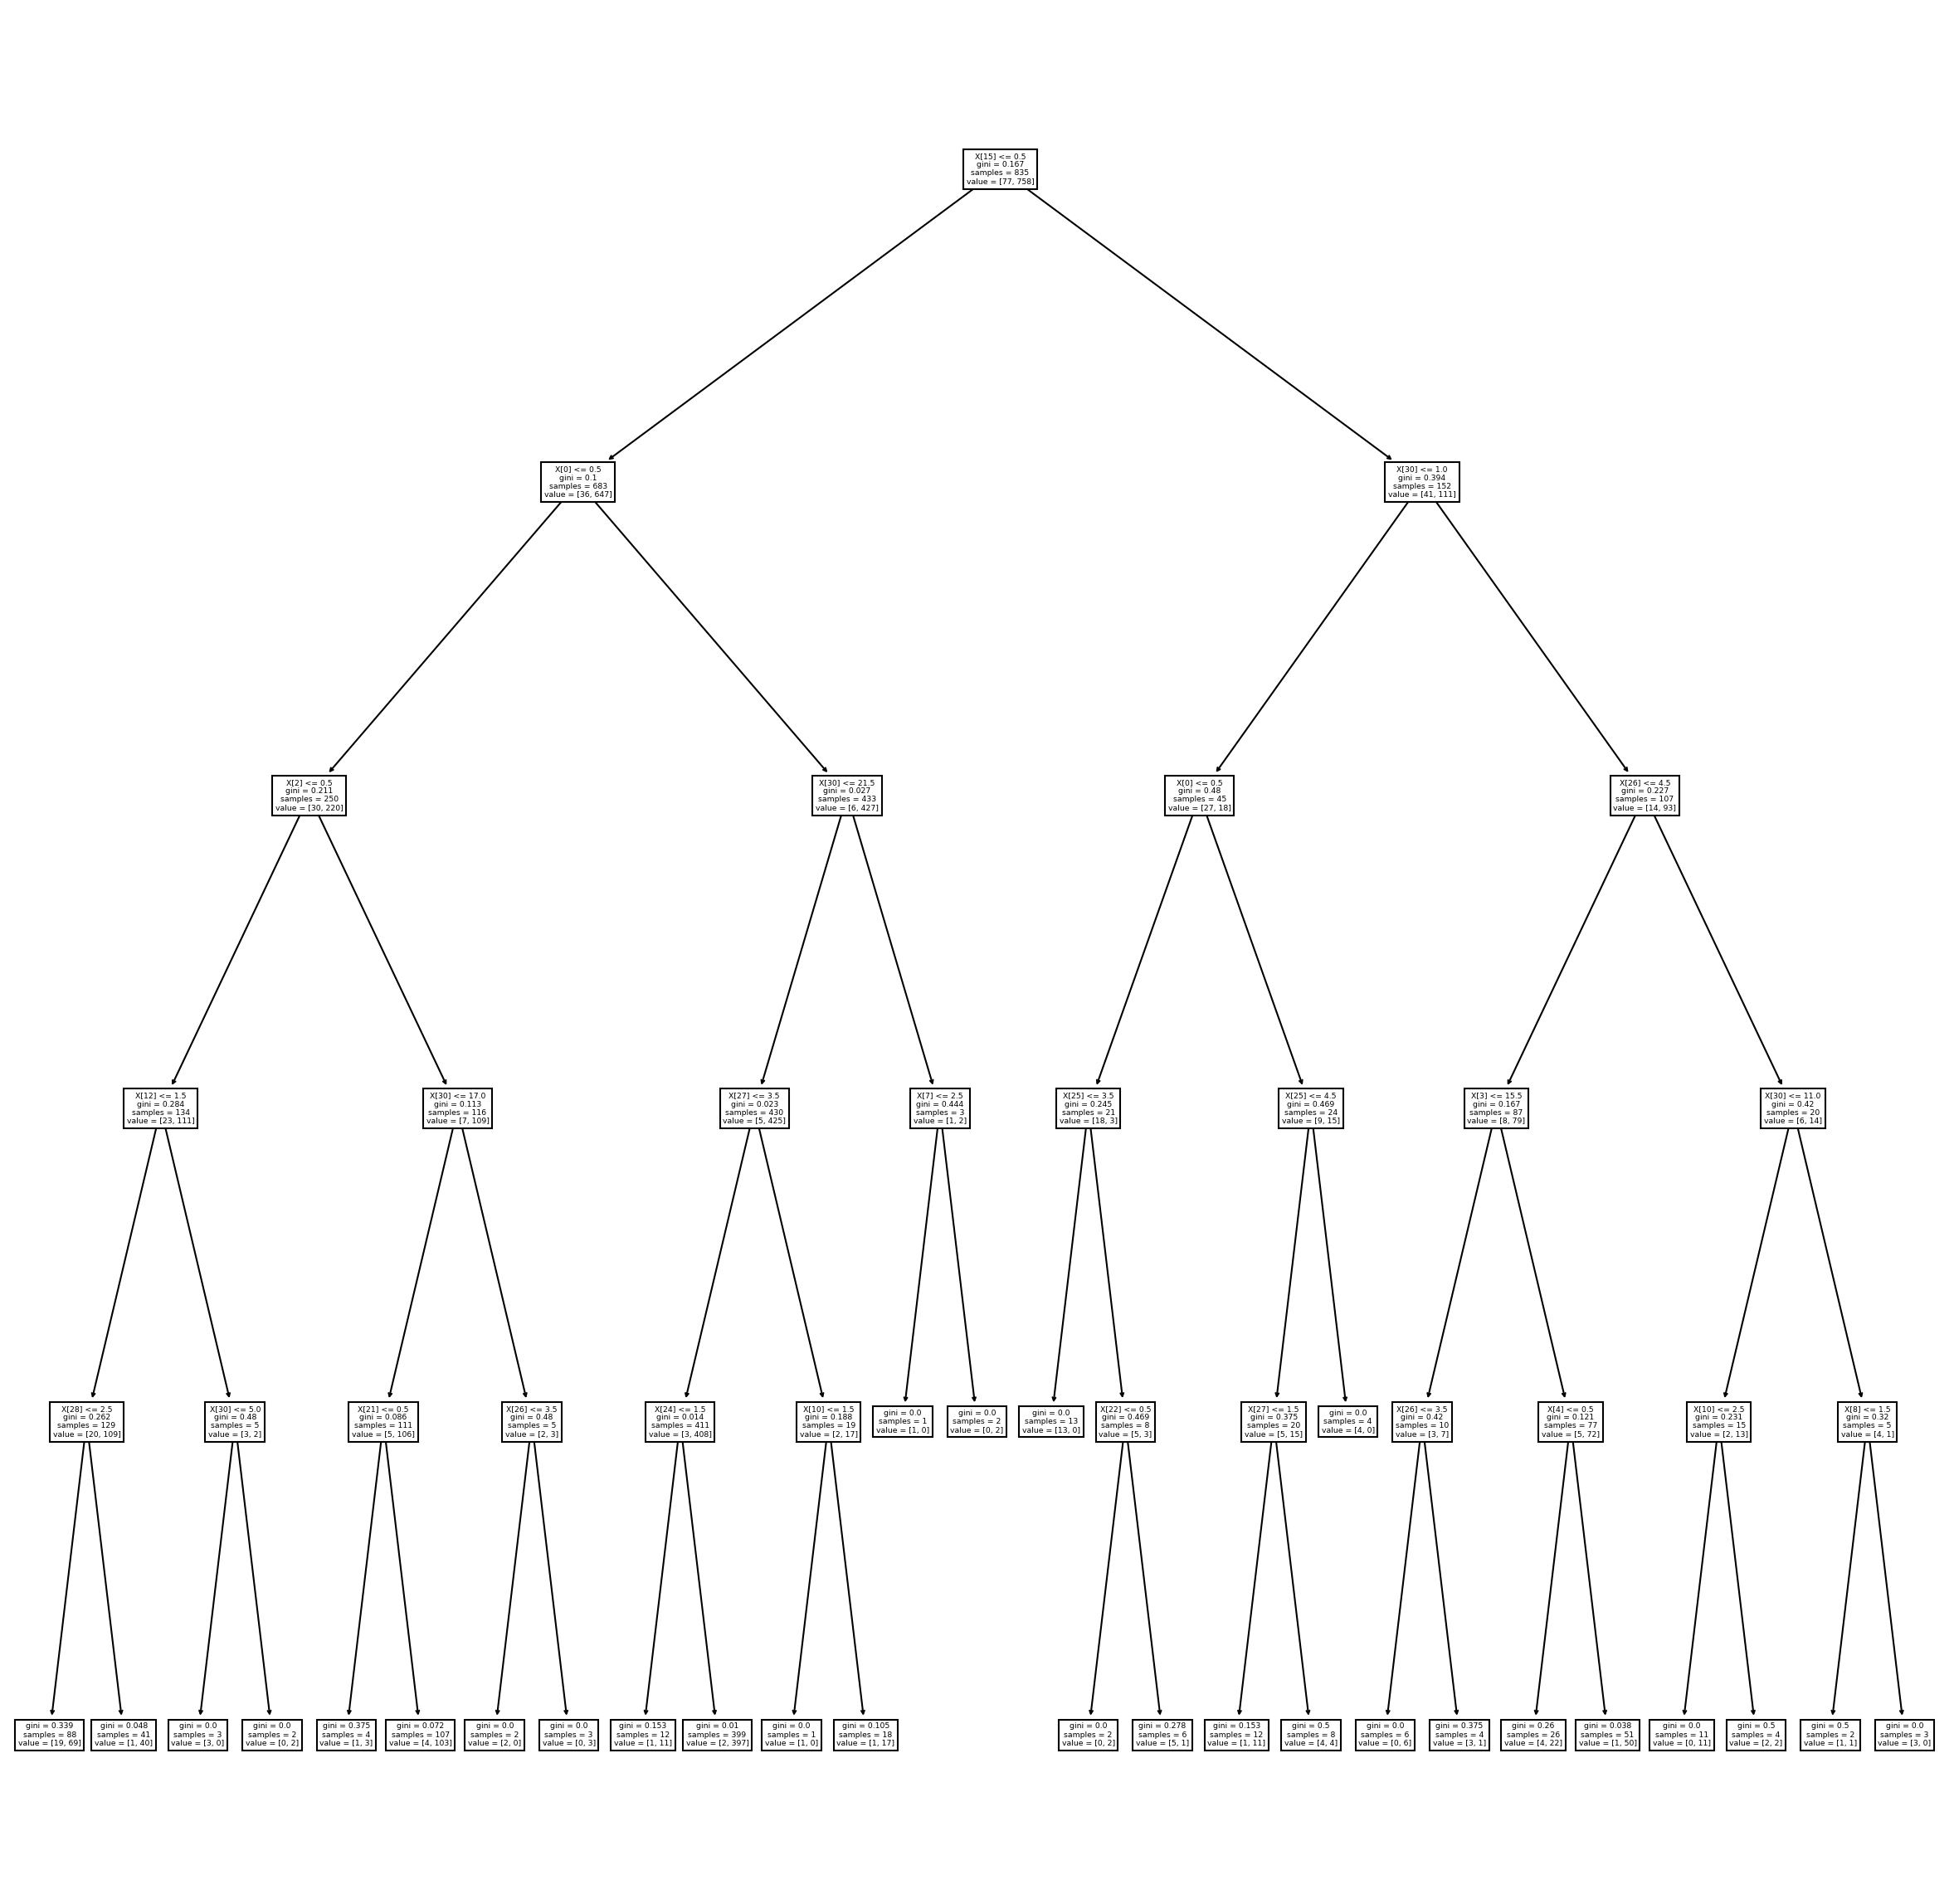

Tree 3 roc_auc_score: 0.7085492227979275


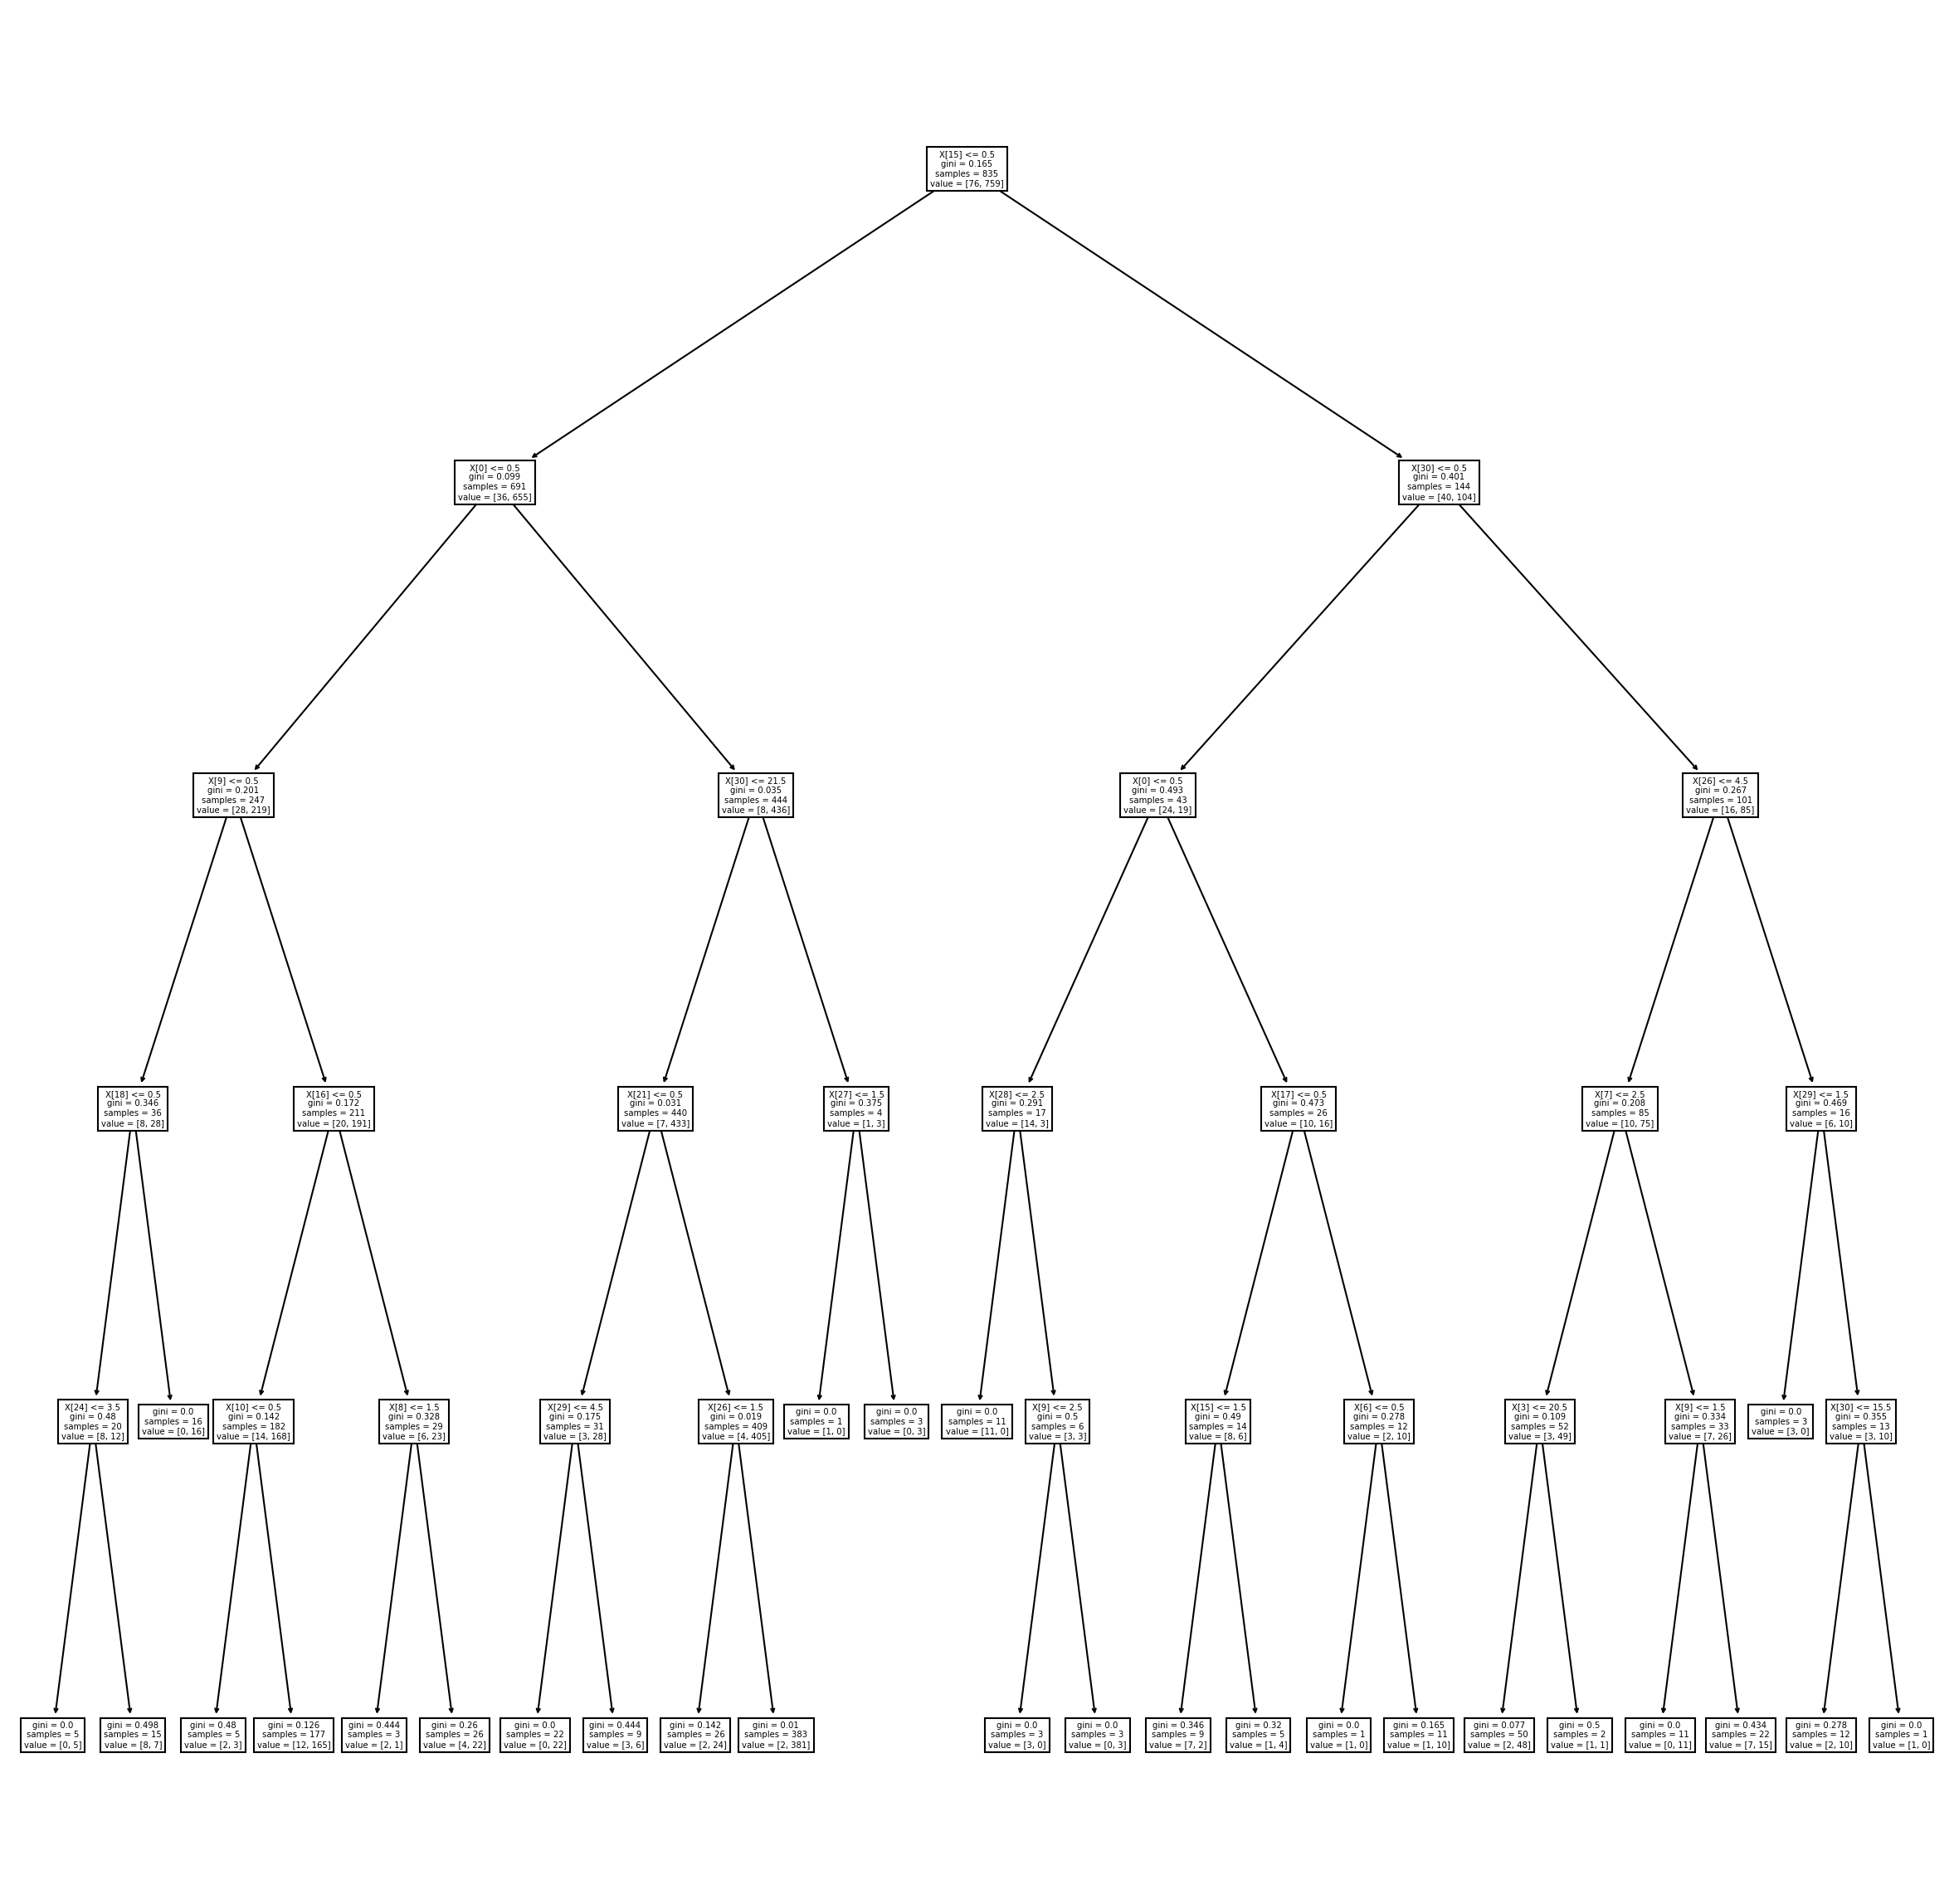

Tree 4 roc_auc_score: 0.581111111111111


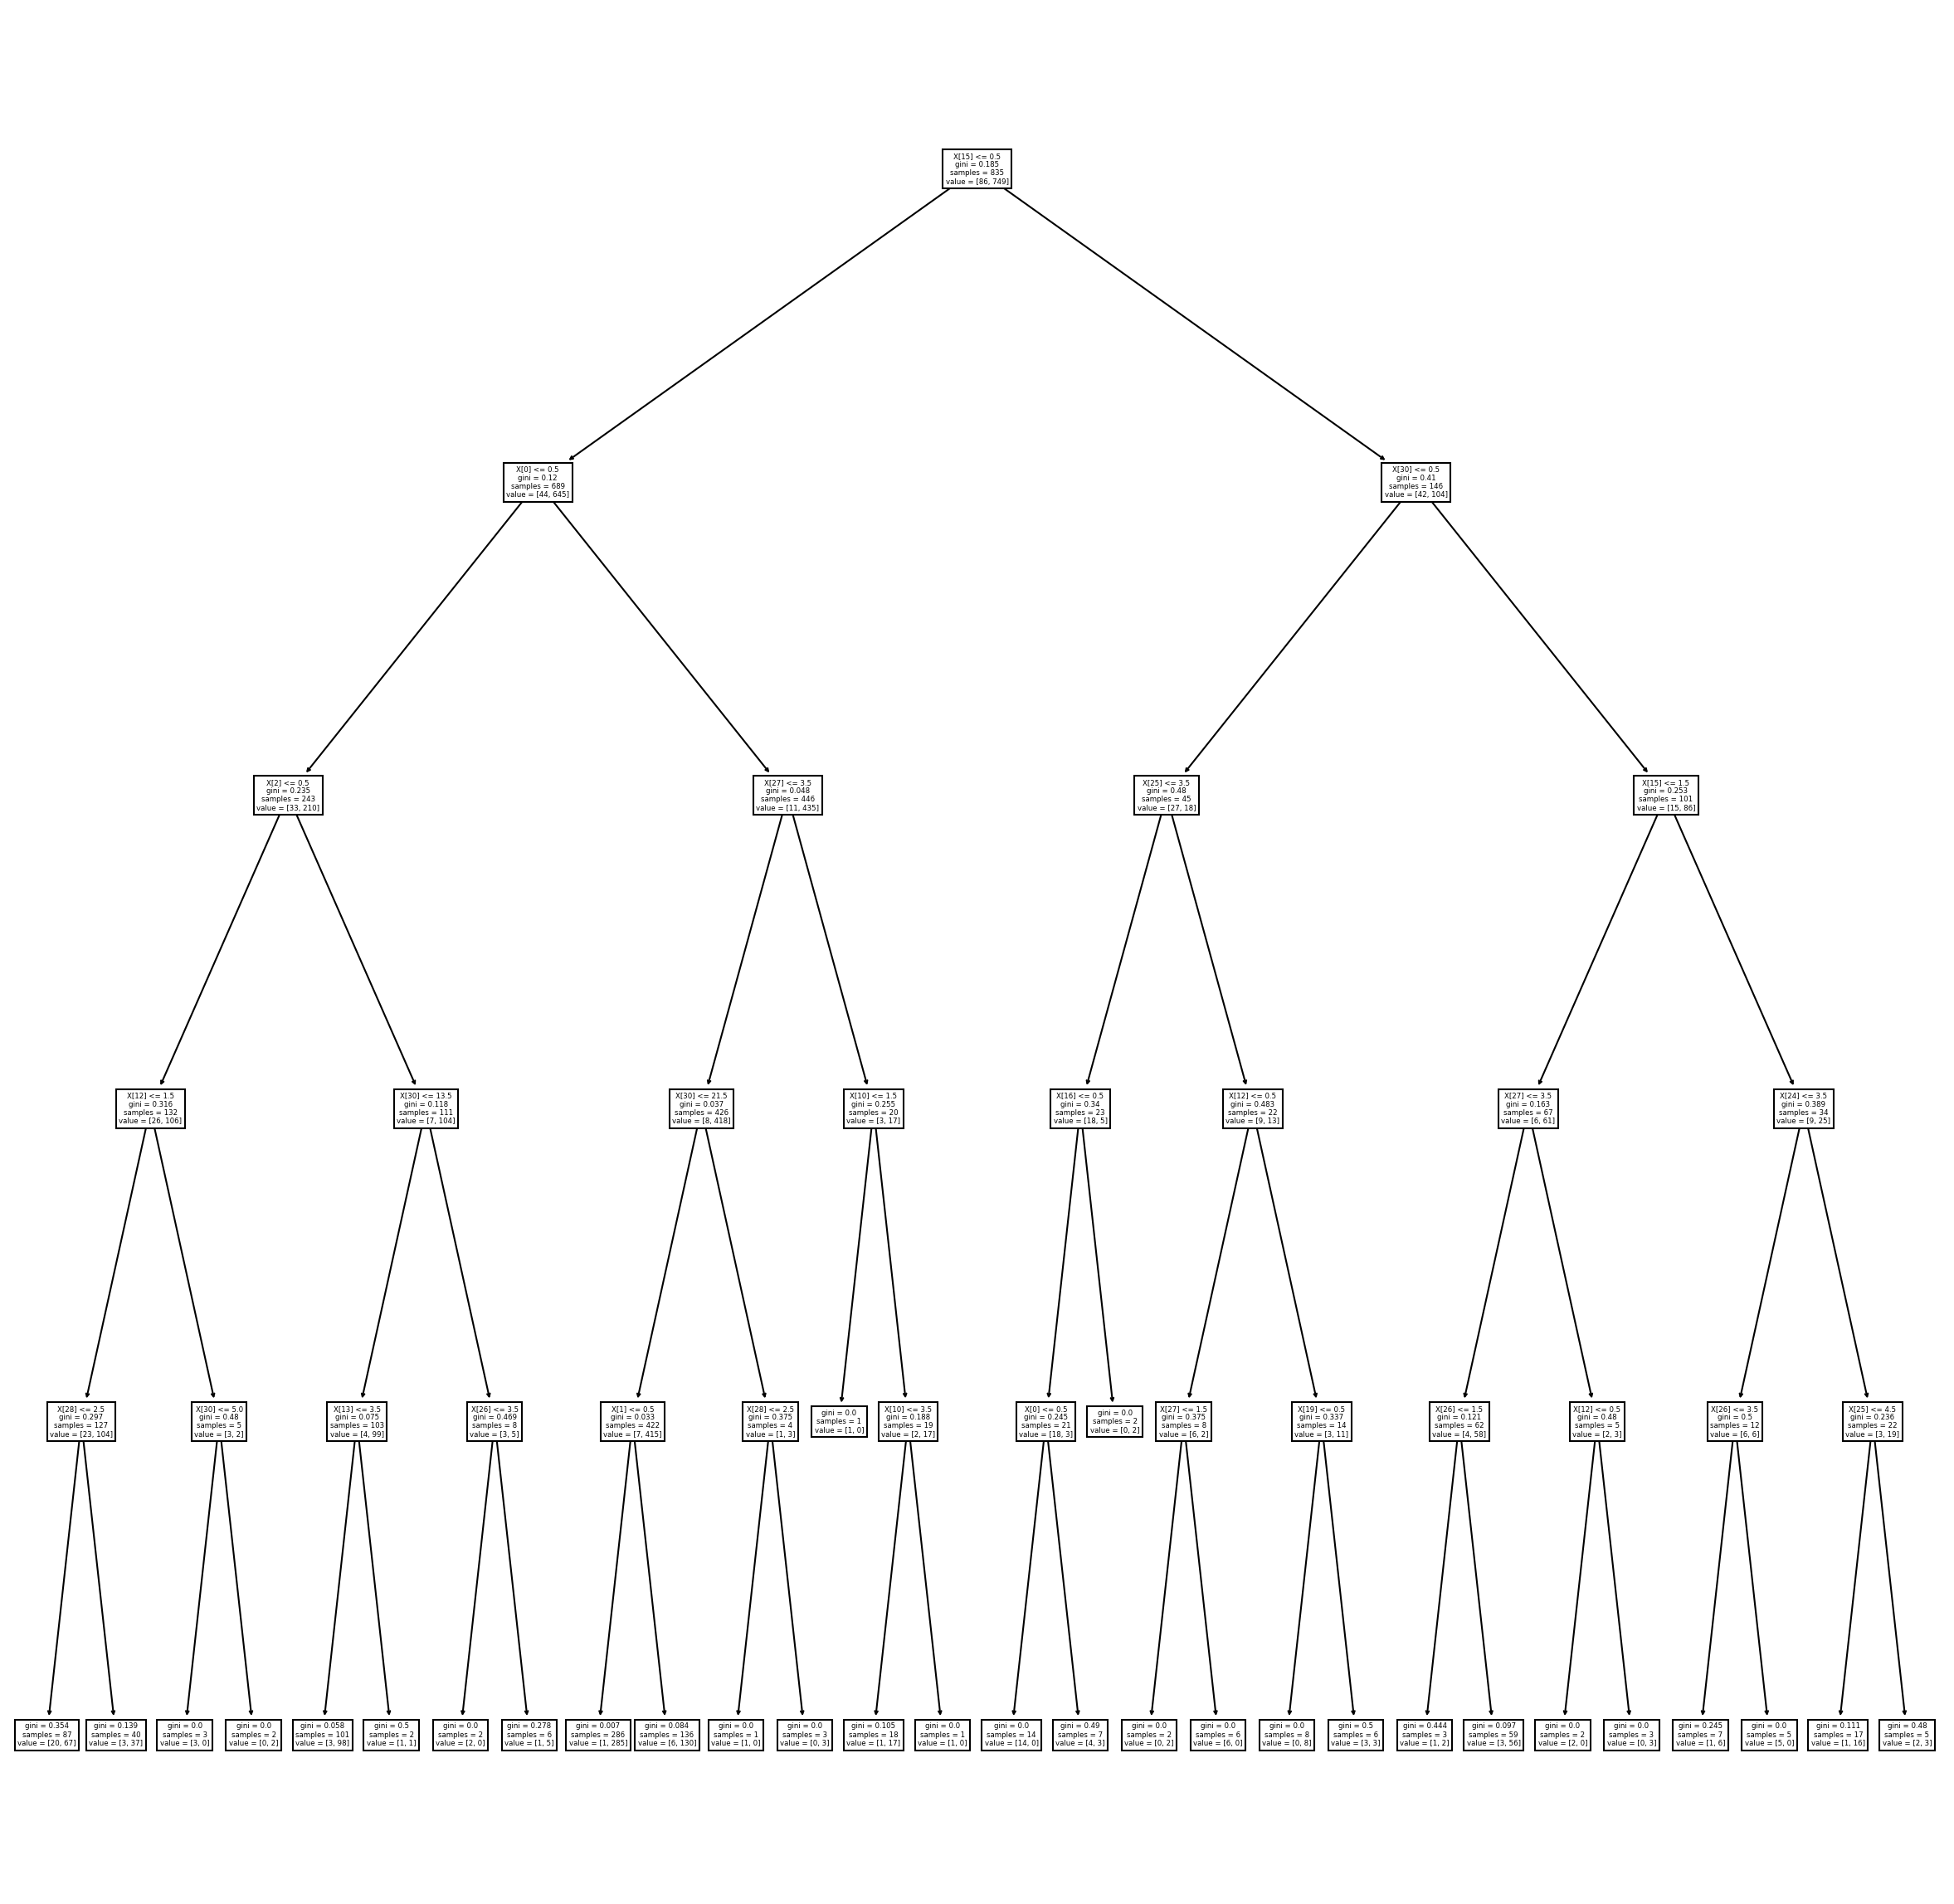

Tree 5 roc_auc_score: 0.6970639032815198


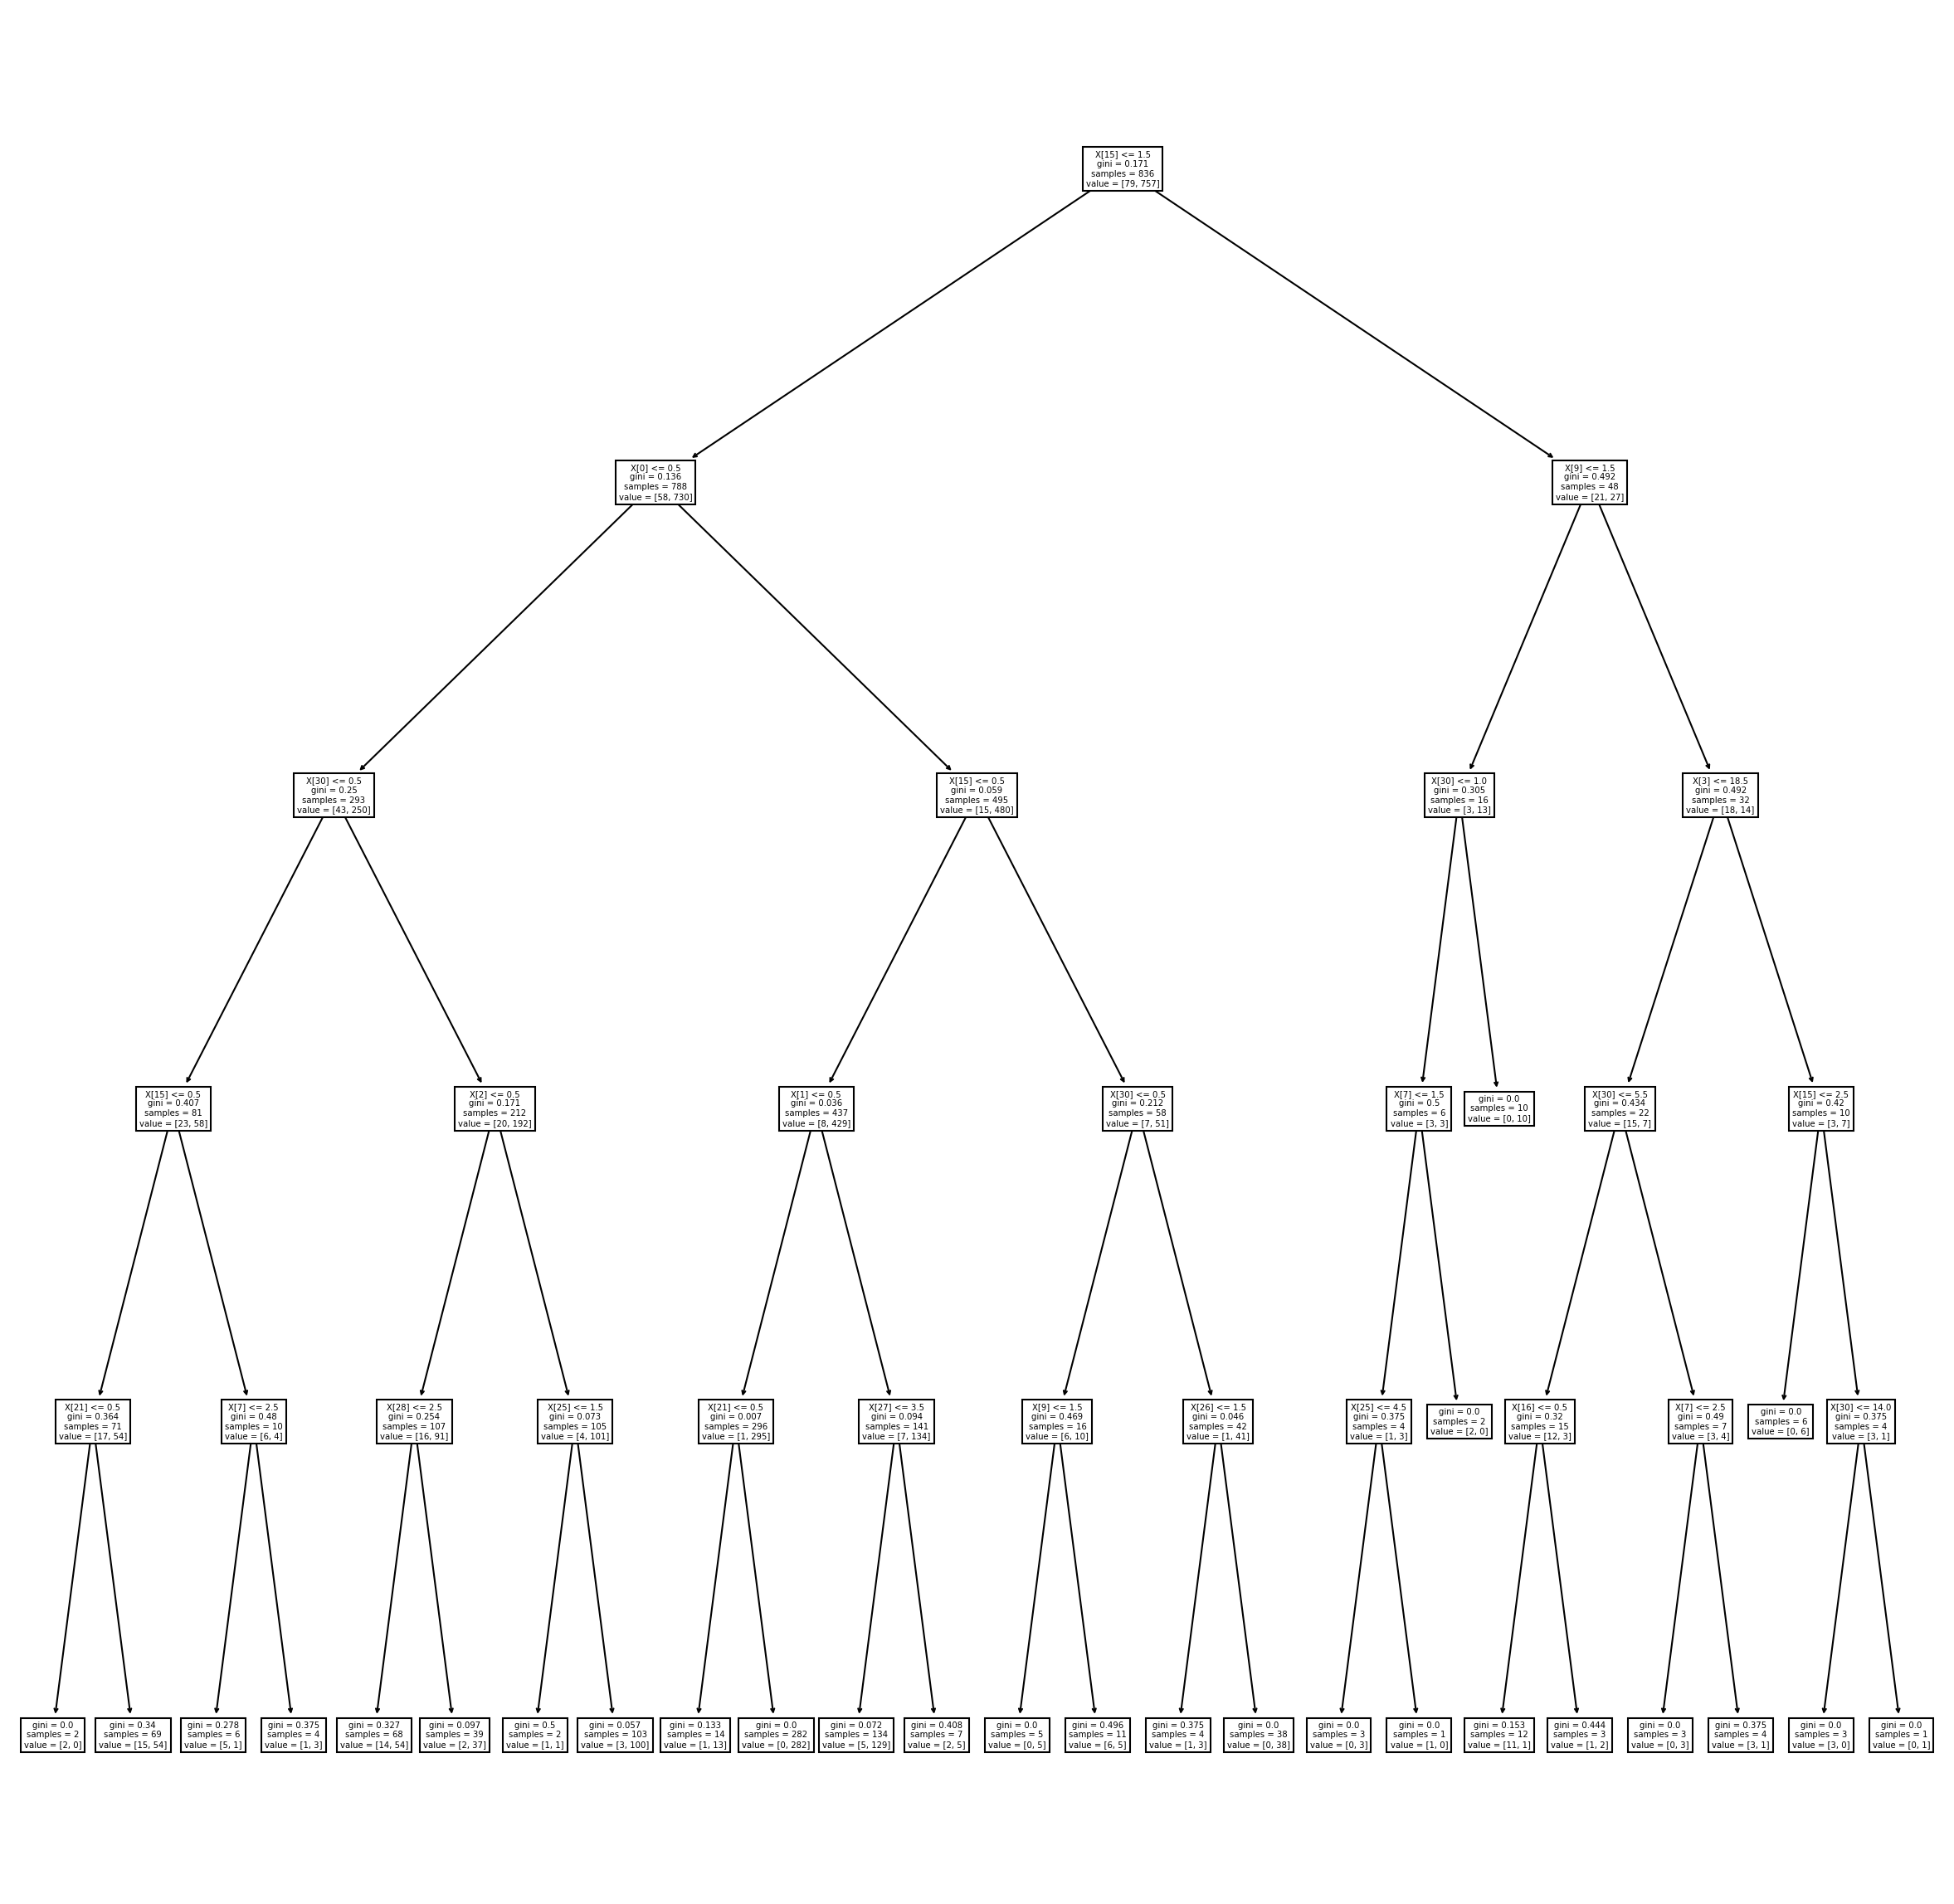

In [207]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold

dec_tree_class = DecisionTreeClassifier(max_depth=5)

kfold = KFold(5)
n = 0
best_rocauc = 0
tree_ro_print = dec_tree_class

for train, test in kfold.split(data_binary):
    n += 1
    X_tree_train = data_binary.iloc[train].drop(columns=['G3'])
    y_tree_train = np.where(data_binary.iloc[train]['G3']>=8, 1, 0)
    
    X_tree_test = data_binary.iloc[test].drop(columns=['G3'])
    y_tree_test = np.where(data_binary.iloc[test]['G3']>=8, 1, 0)
    
    dec_tree_class.fit(X_tree_train, y_tree_train)
    results = dec_tree_class.predict(X_tree_test)
    print(f'Tree {n} roc_auc_score: {roc_auc_score(results, y_tree_test)}')
    
    plt.figure(figsize=(20, 20), dpi=150)
    plot_tree(dec_tree_class)
    plt.show()
    
    if roc_auc_score(results, y_tree_test) > best_rocauc:
        best_rocauc = roc_auc_score(results, y_tree_test)
        tree_ro_print = dec_tree_class

### Выводы

Деревья под номерами 2 и 3 больше всего похожи друг на друга по структуре. В дереве 1 меньше правил на последнем уровне перед листьями, а в 4 наоборот - больше. Дерево 5 имеет смещенную влево структуру, в то время как остальные деревья довольно симметричны.

Лучше всего со своей задачей справилось дерево 3.

### Задание 2  
  
На кросс-валидации (5-fold из 2 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

Random Forest 1 estimators mean roc_auc_score: 0.8701923076923077
Random Forest 11 estimators mean roc_auc_score: 0.9086538461538461
Random Forest 21 estimators mean roc_auc_score: 0.9134615384615384
Random Forest 31 estimators mean roc_auc_score: 0.9038461538461539
Random Forest 41 estimators mean roc_auc_score: 0.9086538461538461
Random Forest 51 estimators mean roc_auc_score: 0.9086538461538461
Random Forest 61 estimators mean roc_auc_score: 0.9038461538461539
Random Forest 71 estimators mean roc_auc_score: 0.9086538461538461
Random Forest 81 estimators mean roc_auc_score: 0.9086538461538461
Random Forest 91 estimators mean roc_auc_score: 0.9086538461538461
Random Forest 101 estimators mean roc_auc_score: 0.9134615384615384
Random Forest 111 estimators mean roc_auc_score: 0.9086538461538461
Random Forest 121 estimators mean roc_auc_score: 0.9038461538461539
Random Forest 131 estimators mean roc_auc_score: 0.9086538461538461
Random Forest 141 estimators mean roc_auc_score: 0.90865384

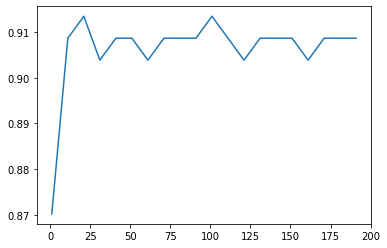

In [208]:
from sklearn.ensemble import RandomForestClassifier

ranforest_model = RandomForestClassifier()

kfold = KFold(5)
estimators_scores = {}

for estimator in range(1, 201, 10):
    roc_scores = []
    for _ in range(2):
        for train, test in kfold.split(data_binary):
            X_tree_train = data_binary.iloc[train].drop(columns=['G3'])
            y_tree_train = np.where(data_binary.iloc[train]['G3']>=8, 1, 0)

            X_tree_test = data_binary.iloc[test].drop(columns=['G3'])
            y_tree_test = np.where(data_binary.iloc[test]['G3']>=8, 1, 0)
        
            ranforest_model = RandomForestClassifier(n_estimators=estimator)
            ranforest_model.fit(X_tree_train, y_tree_train)
            results = ranforest_model.predict(X_tree_test)
        
    roc_scores.append(ranforest_model.score(X_tree_test, y_tree_test))
    estimators_scores[estimator] = sum(roc_scores)/len(roc_scores)
    print(f'Random Forest {estimator} estimators mean roc_auc_score: {sum(roc_scores)/len(roc_scores)}')

plt.plot(estimators_scores.keys(), estimators_scores.values())
plt.show()

### Вывод по Заданию 2

Оптимальное количество деревьев - 20 и 100. Простое дерево решений (n_estimators=1) показало самый плохой результат, что вполне ожидаемо, учитывая особенность и работу модели. График имеет (в некотором виде) волновую структуру, все значения близки к 0.91.

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Обучите Random Forest  с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

Seconds spent: 2.200294256210327
Random Forest total F1-score: 0.955


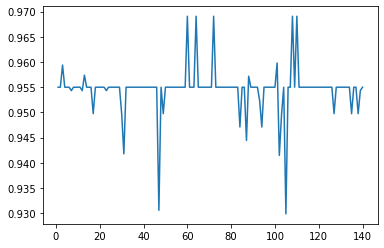

In [209]:
import time
from sklearn.metrics import f1_score

ranforest_model = RandomForestClassifier()
ranforest_model.fit(X_train_binary, y_train_binary)

ranforest_params = {
    'n_estimators': list(range(40, 141, 20)),
    'max_depth': list(range(1, 4)),
    'min_samples_split': list(range(2, 5)),
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

start_time = time.time()

search = RandomizedSearchCV(ranforest_model, scoring='f1', cv=5, refit=True, n_jobs=-1, param_distributions=ranforest_params)
search.fit(X_train_binary, y_train_binary)

fin_time = time.time() - start_time
print('Seconds spent:', fin_time)

ranforest_model = search.best_estimator_
ranforest_model.fit(X_train_binary, y_train_binary)
y_pred_forest = ranforest_model.predict(X_test_binary)

print('Random Forest total F1-score:', f1_score(y_test_binary, y_pred_forest))
estims_scores = [f1_score(y_test_binary, est.predict(X_test_binary)) for est in ranforest_model.estimators_]

plt.plot(list(range(1, len(estims_scores)+1)), estims_scores)
plt.show()

### Вывод 1

Из графика очевидно, как значение F1-score всего леса получилось имено таким, большое количество деревьев получили именно такое значение. Довольно много деревьев имеют сильное отличие в функции от среднего значения в рамках данного масштаба (пики и ямы графика).

In [210]:
pd.DataFrame(ranforest_model.feature_importances_, X_test_binary.columns, columns=['Coefficients']).T

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
Coefficients,0.185479,0.01256,0.002641,0.057362,0.01402,0.017671,0.00177,0.016241,0.043847,0.017363,0.019313,0.010242,0.005534,0.010049,0.02878,0.20438,0.005936,0.005651,0.010008,0.005887,0.002878,0.044143,0.002399,0.020958,0.016042,0.014779,0.028265,0.052044,0.026767,0.012256,0.104734


### Вывод по коэффициентам

В данной модели нет достаточно значимых признаков (все <= 0.2), что говорит о довольно точной и аккуратной настройке всего леса. Самые значимые признаки, опять же subject и failures.

### Задание 4  
  
* Примените логистическую регрессию для решения задачи, подберите оптимальные значения гиперпараметров. Оцените качество (roc auc) на 5-fold валидации из 2 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Обучите логистическую модель с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество - постройте ROC-кривую, вычислите roc auc. Вычислите аналогичную метрику для Random Forest из Задания 3, сравните точность моделей. 

In [211]:
import warnings
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')

log_reg = LogisticRegression()
log_reg.fit(X_train_binary, y_train_binary)

log_reg_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
search = RandomizedSearchCV(log_reg, scoring='roc_auc', cv=5, refit=True, n_jobs=-1, param_distributions=log_reg_params)
search.fit(X_train_binary, y_train_binary)

log_reg = search.best_estimator_
log_reg

LogisticRegression(penalty='l1', solver='liblinear')

In [212]:
ranforest_model_auc = RandomForestClassifier()
ranforest_model_auc.fit(X_train_binary, y_train_binary)

search = RandomizedSearchCV(ranforest_model_auc, scoring='roc_auc', cv=5, refit=True, n_jobs=-1, param_distributions=ranforest_params)
search.fit(X_train_binary, y_train_binary)

ranforest_model_auc = search.best_estimator_
ranforest_model_auc

RandomForestClassifier(criterion='entropy', max_depth=2, max_features='sqrt',
                       min_samples_split=4, n_estimators=40)

In [213]:
roc_scores = {'log': [], 'ranforest': []}
for _ in range(2):
    kfold = KFold(5)
    for train, test in kfold.split(data_binary):
        X_fold_train = data_binary.iloc[train].drop(columns=['G3'])
        y_fold_train = np.where(data_binary.iloc[train]['G3']>=8, 1, 0)

        X_fold_test = data_binary.iloc[test].drop(columns=['G3'])
        y_fold_test = np.where(data_binary.iloc[test]['G3']>=8, 1, 0)
        
        log_reg.fit(X_fold_train, y_fold_train)
        result = log_reg.predict(X_fold_test)
        roc_scores['log'].append(roc_auc_score(result, y_fold_test))
        
        ranforest_model_auc.fit(X_fold_train, y_fold_train)
        y_pred_new_forest = ranforest_model_auc.predict(X_fold_test)
        #roc_scores['ranforest'].append(roc_auc_score(y_pred_forest, y_fold_test))

print('LogisticRegression score:', (sum(roc_scores['log'])/len(roc_scores['log'])))
#print('RandomForest score:', (sum(roc_scores['ranforest'])/len(roc_scores['ranforest']))

LogisticRegression score: 0.7442404469459076


ROC_AUC score: 0.7698492462311557


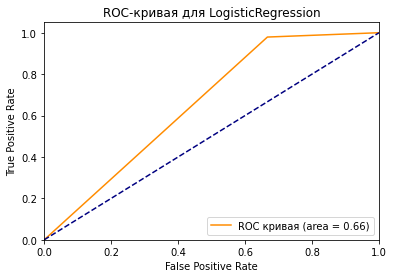

In [214]:
from sklearn.metrics import roc_curve, auc

log_reg.fit(X_train_binary, y_train_binary)
result = log_reg.predict(X_test_binary)
print('ROC_AUC score:', roc_auc_score(result, y_test_binary))

# рассчитываем ROC-кривую
fpr, tpr, treshold = roc_curve(y_test_binary, result)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для LogisticRegression')
plt.legend(loc="lower right")
plt.show()

Random Forest total roc_auc score: 0.5


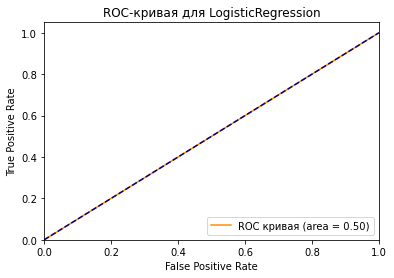

In [215]:
ranforest_model_auc.fit(X_train_binary, y_train_binary)
y_fores_new = ranforest_model_auc.predict(X_test_binary)
print('Random Forest total roc_auc score:', roc_auc_score(y_test_binary, y_fores_new))

# рассчитываем ROC-кривую
fpr, tpr, treshold = roc_curve(y_test_binary, y_fores_new)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для LogisticRegression')
plt.legend(loc="lower right")
plt.show()

### Вывод по заданию 4

LogisticRegression вполне неплохо справилась с этой задачей, лучше RandomForest почти в 1.5 раза.

### Задание 5  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Обучите модель с настроенными параметрами на всех данных для моделирования и оцените качество на отложенной выборке. Сравните результаты с другими моделями, дайте комментарий.

In [216]:
#!conda install xgboost

In [217]:
import xgboost
from sklearn.metrics import accuracy_score

xgb_model = xgboost.XGBClassifier()
xgb_model.fit(X_train_binary, y_train_binary)

xgb_params = {
    'n_estimators': list(range(1, 11)),
    'max_depth': list(range(1, 15)),
    'booster': ['gbtree', 'gblinear', 'dart']
}

start = time.time()
search = RandomizedSearchCV(xgb_model, scoring='f1', cv=5, refit=True, n_jobs=-1, param_distributions=xgb_params)
search.fit(X_train_binary, y_train_binary)
final = time.time() - start
print('Seconds spent on xgboost:', final)

xgb_model = search.best_estimator_
xgb_model.fit(X_train_binary, y_train_binary)

res_xgb = xgb_model.predict(X_test_binary)

print('\n\nXGBoost roc_auc score:', roc_auc_score(y_test_binary, res_xgb))

[21:24:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Seconds spent on xgboost: 0.8800733089447021
[21:24:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBoost roc_auc score: 0.6892088423502036


### Вывод по заданию 5

Модель XGBoost (XGBClassifier) справилось с задачей вполне неплохо, но значительно хуже RandomForest. Относительно других моделей (которые считались по другой метрике), эта модель также проигрывает почти всем в качестве.

##  Часть 4. Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* Для решения задачи примените следующие методы:  
  * KNN  
  * Логистическая регрессия  
  * Деревья решений  
  * Random Forest
  * Gradient Boosting
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, используйте confusion matrix и производные от нее метрики. Сделайте выводы.    

In [218]:
dict_marks = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0,
            8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1,
            14: 2, 15: 2, 16: 2, 17: 2,
            18: 3, 19: 3, 20: 3}

y_train_many = y_train.map(dict_marks)
y_test_many = y_test.map(dict_marks)

In [219]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def get_confusion(y_true, y_pred):
    result = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix:')
    print(result)

    result1 = classification_report(y_true, y_pred)
    print('Classification Report:')
    print(result1)

    result2 = accuracy_score(y_true, y_pred)
    print('Accuracy:', result2)

In [220]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_multi = KNeighborsClassifier()
knn_multi.fit(X_train_binary, y_train_many)

knn_multi_params = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'metric': ['chebyshev', 'euclidean', 'manhattan', 'minkowski']
}

search = RandomizedSearchCV(knn_multi, scoring='neg_mean_squared_error', cv=5, refit=True, n_jobs=-1, param_distributions=knn_multi_params)
search.fit(X_train_binary, y_train_many)
knn_multi = search.best_estimator_
knn_multi.fit(X_train_binary, y_train_many)

y_pred_knn = knn_multi.predict(X_test_binary)
get_confusion(y_test_many, y_pred_knn)

Confusion Matrix:
[[  2  16   0   0]
 [  4 111  17   1]
 [  1  31  15   1]
 [  0   7   2   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.11      0.16        18
           1       0.67      0.83      0.74       133
           2       0.44      0.31      0.37        48
           3       0.33      0.10      0.15        10

    accuracy                           0.62       209
   macro avg       0.43      0.34      0.36       209
weighted avg       0.57      0.62      0.58       209

Accuracy: 0.6172248803827751


In [221]:
# LogisticRegression
log_reg_multi = LogisticRegression()
log_reg_multi.fit(X_train_binary, y_train_many)

log_reg_multi_params = {
    'penalty': ['l1', 'l2', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
search = RandomizedSearchCV(log_reg_multi, scoring='roc_auc', cv=5, refit=True, n_jobs=-1, param_distributions=log_reg_multi_params)
search.fit(X_train_binary, y_train_many)

log_reg_multi = search.best_estimator_
log_reg_multi.fit(X_train_binary, y_train_many)

log_reg_res = log_reg_multi.predict(X_test_binary)
get_confusion(y_test_many, log_reg_res)

Confusion Matrix:
[[  5  13   0   0]
 [  1 116  16   0]
 [  0  30  18   0]
 [  0   6   4   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.28      0.42        18
           1       0.70      0.87      0.78       133
           2       0.47      0.38      0.42        48
           3       0.00      0.00      0.00        10

    accuracy                           0.67       209
   macro avg       0.50      0.38      0.40       209
weighted avg       0.63      0.67      0.63       209

Accuracy: 0.6650717703349283


In [222]:
# DecisionTree
dec_tree_multi = DecisionTreeClassifier()
dec_tree_multi.fit(X_train_binary, y_train_many)

dec_tree_multi_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(1, 15)),
    'min_samples_split': list(range(2, 6))
}

search = RandomizedSearchCV(dec_tree_multi, scoring='roc_auc', cv=5, refit=True, n_jobs=-1, param_distributions=dec_tree_multi_params)
search.fit(X_train_binary, y_train_many)

dec_tree_multi = search.best_estimator_
dec_tree_multi.fit(X_train_binary, y_train_many)

dec_tree_res = dec_tree_multi.predict(X_test_binary)
get_confusion(y_test_many, dec_tree_res)

Confusion Matrix:
[[ 6 10  2  0]
 [20 94 17  2]
 [ 6 20 20  2]
 [ 2  4  4  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.33      0.23        18
           1       0.73      0.71      0.72       133
           2       0.47      0.42      0.44        48
           3       0.00      0.00      0.00        10

    accuracy                           0.57       209
   macro avg       0.34      0.36      0.35       209
weighted avg       0.59      0.57      0.58       209

Accuracy: 0.5741626794258373


In [223]:
# RandomForest
ranforest_multi = RandomForestClassifier()
ranforest_multi.fit(X_train_binary, y_train_many)

ranforest_multi_params = {
    'n_estimators': list(range(40, 141, 20)),
    'max_depth': list(range(1, 4)),
    'min_samples_split': list(range(2, 5)),
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

search = RandomizedSearchCV(ranforest_multi, scoring='f1', cv=5, refit=True, n_jobs=-1, param_distributions=ranforest_multi_params)
search.fit(X_train_binary, y_train_many)

ranforest_multi = search.best_estimator_
ranforest_multi.fit(X_train_binary, y_train_many)

ranforest_res = ranforest_multi.predict(X_test_binary)
get_confusion(y_test_many, ranforest_res)

Confusion Matrix:
[[  0  18   0   0]
 [  0 133   0   0]
 [  0  48   0   0]
 [  0  10   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.64      1.00      0.78       133
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        10

    accuracy                           0.64       209
   macro avg       0.16      0.25      0.19       209
weighted avg       0.40      0.64      0.49       209

Accuracy: 0.6363636363636364


In [224]:
# Gradient Boosting
xgb_multi = xgboost.XGBClassifier()
xgb_multi.fit(X_train_binary, y_train_many)

xgb_multi_params = {
    'n_estimators': list(range(1, 11)),
    'max_depth': list(range(1, 15)),
    'booster': ['gbtree', 'gblinear', 'dart']
}

search = RandomizedSearchCV(xgb_multi, scoring='f1', cv=5, refit=True, n_jobs=-1, param_distributions=xgb_multi_params)
search.fit(X_train_binary, y_train_many)

xgb_multi = search.best_estimator_
xgb_multi.fit(X_train_binary, y_train_many)

res_xgb_multi = xgb_multi.predict(X_test_binary)
get_confusion(y_test_many, res_xgb_multi)

[21:24:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix:
[[  5  12   1   0]
 [  2 114  15   2]
 [  1  20  26   1]
 [  1   3   5   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.28      0.37        18
           1  

### Выводы

В данной задаче, наоборот, XGBoosting справился лучше всех. В худшую сторону по качеству выделяется DecisionTree, остальные модели находятся примерно в одном диапазоне значений функции качества.